# **Lasso Regularization**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

# **Lasso Regularization on 2D data**

Hyperparameters:
- alpha
- fit_intercept
- tol - tolerance of coef
- max_iter = GD

In [31]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

## Comparison of Best Fit Line for various values of alpha

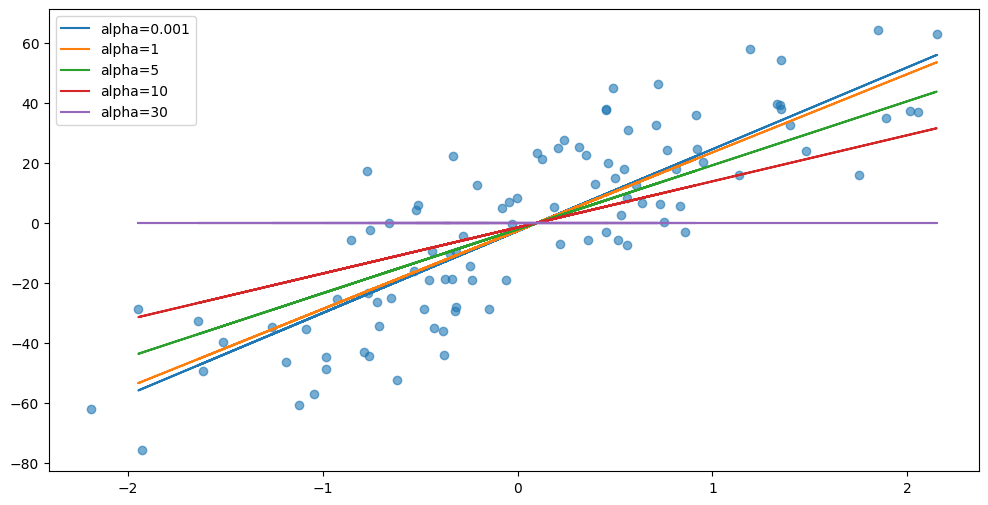

In [32]:
alphas = [0.001,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y, alpha=0.6)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()
    

# **Lasso using Gradient Descent**

In [33]:
model = SGDRegressor(penalty='l1', loss="squared_error", alpha=0.01)
model.fit(X_train, y_train)

SGDRegressor(alpha=0.01, penalty='l1')

In [34]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.6953511550336247

# **Lasso Regularization on Polynomial Data**

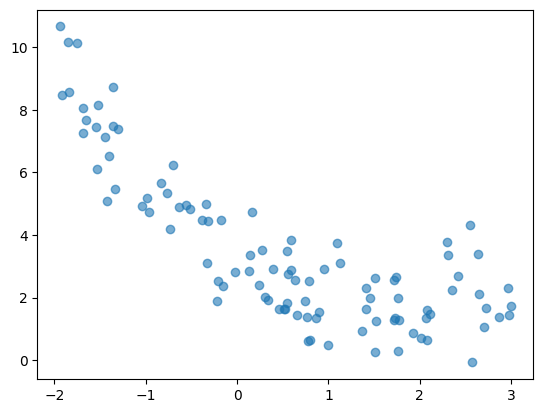

In [35]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2, alpha=0.6)
plt.show()

## Comparison of Best Fit Curve for various values of alpha

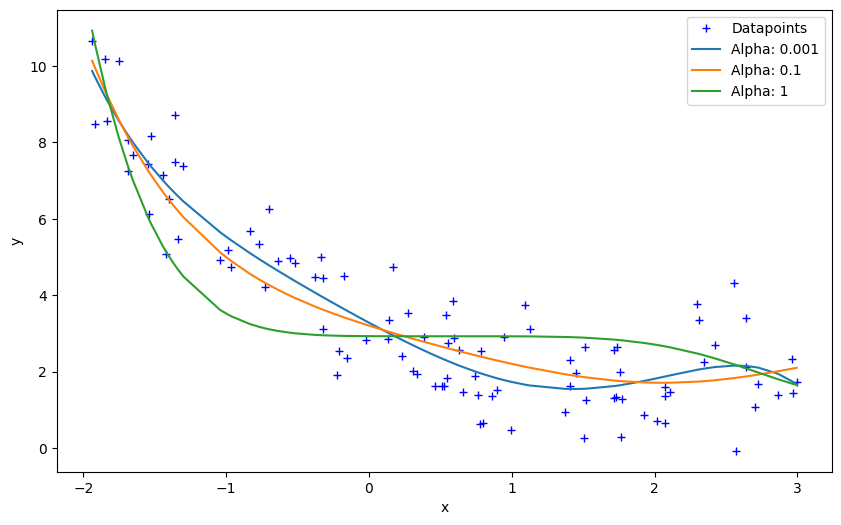

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('std', StandardScaler()),
        ('poly_feats', PolynomialFeatures(degree=6)),
        ('lasso', Lasso(alpha=alpha, max_iter=1000, fit_intercept=True, random_state=42, ))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0.001, 0.1, 1]

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha in alphas:
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], label='Alpha: {}'.format(alpha))

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()